### Practica4: Forward Propagation


In [1]:
import numpy as np
import matplotlib.pyplot as plt

###Modelo 1

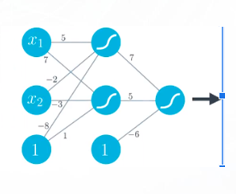

In [2]:
def sigmoid(X):
  return 1/(1+np.exp(-X))

def forw_propagation(X,wH,wO,fb):
    if fb == 1: #si el modelo usa bias se agrega al vector
      bias = np.ones((X.shape[0], 1))
      X = np.hstack((X, bias)) #agregar bias al vector de datos
    
    layerH = sigmoid(np.matmul(wH, X.T))
    
    if fb == 1: #si el modelo usa bias se agrega al vector
      bias = np.ones((layerH.shape[1]))
      layerH_b = np.vstack((layerH, bias)) #agregar bias al vector de capa intermedia H
      layerOut = sigmoid(np.matmul(wO, layerH_b))
    else:
      layerOut = sigmoid(np.matmul(wO, layerH))
      
    return layerOut, layerH

In [3]:
def mayorPresencia(Hs,X):

  HsT = Hs.T
  
  for i in range(0,HsT.shape[0]):
    print("para la entrada X"+str(i+1)+"="+str(X[i])+" la caracteristica intermedia con mayor presencia es h"+str(np.argmax(HsT[i])+1))

In [4]:
X_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
wHs1 = np.array([[5, -2, -8], [7, -3, 1]]) #pesos de capa intermedia
wOut1 = np.array([[7, 5, -6]]) #pesos de salida

In [5]:
y1, H1 = forw_propagation(X_data, wHs1, wOut1,1)
print("Matriz resultante H:\n", H1)

Matriz resultante H:
 [[3.35350130e-04 4.53978687e-05 4.74258732e-02 6.69285092e-03]
 [7.31058579e-01 1.19202922e-01 9.99664650e-01 9.93307149e-01]]


In [6]:
mayorPresencia(H1,X_data)

para la entrada X1=[0 0] la caracteristica intermedia con mayor presencia es h2
para la entrada X2=[0 1] la caracteristica intermedia con mayor presencia es h2
para la entrada X3=[1 0] la caracteristica intermedia con mayor presencia es h2
para la entrada X4=[1 1] la caracteristica intermedia con mayor presencia es h2


###Modelo 2

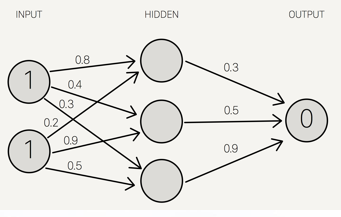

In [7]:
X_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
wHs2 = np.array([[0.8, 0.2], [0.4, 0.9],[0.3, 0.5]]) #pesos de capa intermedia
wOut2 = np.array([[7, 5, -6]]) #pesos de salida

In [8]:
y2, H2 = forw_propagation(X_data, wHs2, wOut2,0)
print("Matriz resultante H:\n", H2)


Matriz resultante H:
 [[0.5        0.549834   0.68997448 0.73105858]
 [0.5        0.7109495  0.59868766 0.78583498]
 [0.5        0.62245933 0.57444252 0.68997448]]


In [9]:
mayorPresencia(H2,X_data)

para la entrada X1=[0 0] la caracteristica intermedia con mayor presencia es h1
para la entrada X2=[0 1] la caracteristica intermedia con mayor presencia es h2
para la entrada X3=[1 0] la caracteristica intermedia con mayor presencia es h1
para la entrada X4=[1 1] la caracteristica intermedia con mayor presencia es h2


###Modelo 3 para XOR

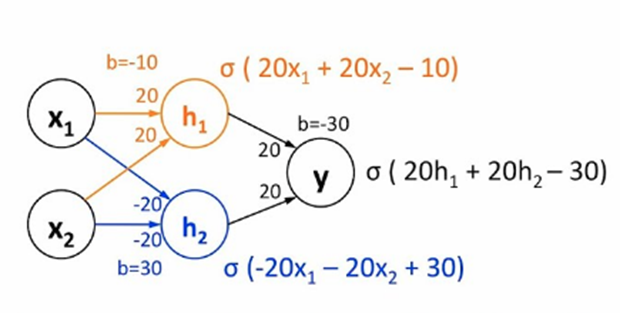

In [10]:
X_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
wHs3 = np.array([[20, 20, -10], [-20, -20, 30]]) #pesos de capa intermedia
wOut3 = np.array([[20, 20, -30]]) #pesos de salida

In [13]:
y3, H3 = forw_propagation(X_data, wHs3, wOut3,1)
print("Matriz resultante H:\n", H3)

Matriz resultante H:
 [[4.53978687e-05 9.99954602e-01 9.99954602e-01 1.00000000e+00]
 [1.00000000e+00 9.99954602e-01 9.99954602e-01 4.53978687e-05]]


In [14]:
def graficarPunto(x1, x2, h):
    f = np.abs(h-1) < 0.1
    nf = np.logical_not(f)
    plt.scatter(x1[f], x2[f], marker='o', label='1',c='r')
    plt.scatter(x1[nf], x2[nf], marker='o', label='0',c='b')
    plt.legend()

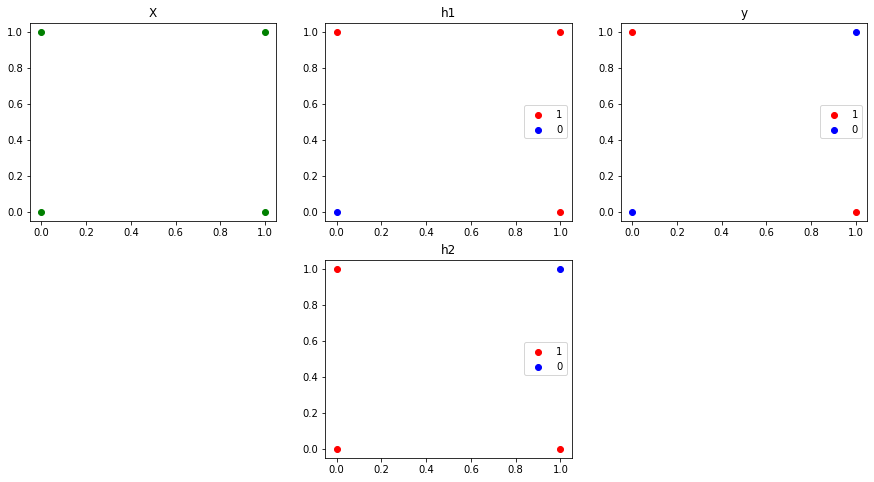

In [15]:
x1 = X_data.T[0, :]
x2 = X_data.T[1, :]

plt.figure(figsize=(15, 8))
plt.subplot(2,3,1)
plt.scatter(x1,x2, marker='o',c='g')
plt.title("X")

plt.subplot(2,3,2)
graficarPunto(x1, x2, H3[0, :])
plt.title("h1")
plt.subplot(2,3,5)
graficarPunto(x1, x2, H3[1, :])
plt.title("h2")
plt.subplot(2,3,3)
graficarPunto(x1, x2, y3.squeeze())
plt.title("y");

La capa intermedia, para h1 actua como una compuerta NOT AND, para h2 como una compuerta OR, y la capa de salida como una compuerta AND, generando asi el resultado XOR. 